<a href="https://colab.research.google.com/github/AYA0HASSAN/LogisticRegression/blob/main/LogisticRegressionLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression From Scratch
#### Authors : Aya Hassan , Monier

In [ ]:
! pip install plotly-express

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from colorama import Fore
import plotly.express as px


## Functions

In [ ]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [ ]:
def gradientDescent(features,yHat,label):
    return np.dot(features.T ,(yHat - label)) / label.shape[0]

In [ ]:
def updateWeightLoss(weight , learningRate , gradient):
    return weight - learningRate * gradient

In [ ]:
def loss(yHat,label):
    return (- label * np.log(yHat) - (1-label) * np.log(1-yHat)).mean()

y = a1x1 + a2x2 + b 

In [ ]:
def logisicRegression(features,labels,iterations,learningRate = 0.001):
    
    # Initizalize Weights
    features = np.c_[np.ones((features.shape[0],1)),features]
    dimention = features.shape[1]
    weight = np.zeros((dimention,1))
    weight_history = np.zeros((iterations,dimention))
    costs = np.zeros(iterations)
    hypothesis = np.zeros((iterations,len(labels)))
    loops = 0
    
    for i in range(iterations):
        # predict y(target)
        yHat = np.dot(features,weight)
        yHat = sigmoid(yHat)
        gradient = gradientDescent(features,yHat,labels)
        weight = updateWeightLoss(weight,learningRate,gradient)
        yHat = np.dot(features,weight)
        yHat = sigmoid(yHat)
        costs[i] = loss(yHat,labels)
        weight_history[i,:] = weight.T
        hypothesis[i,:] = yHat.T
        loops +=1
        # Stop Conditions
        if i > 1 :
            if abs(costs[i-1] - costs[i]) <= 1e-5:
                break
        
    return weight, weight_history, costs, hypothesis, loops

In [ ]:
def predict(features,label, theta):
    summ=0
    features = np.c_[np.ones((features.shape[0],1)),features]
    yHat = np.dot(features,theta)
    ySig = sigmoid(yHat)
    result = pd.DataFrame(np.around(ySig,decimals=4)).join(label)
    
    result['Prediction'] = result[0].apply(lambda x:0 if x <= 0.5 else 1)
    
    for i in range(len(label)):
        if result['Prediction'].values[i] == label.values[i]:
            summ+=1
    # print("====================",summ/len(label))
    
    #print("=========",accuracy_score(label,result['Prediction'].values))
    #print(result)
    return summ/len(label)# accuracy_score(label,result['Prediction'].values)#result

## Load Data

In [ ]:
data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

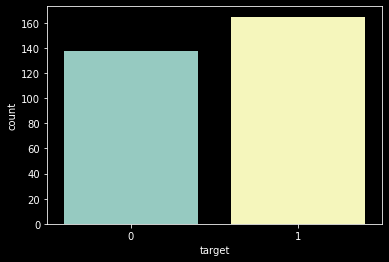

In [ ]:
sns.countplot(data['target'])

### Spliting into Train Test

In [ ]:
np.random.seed(123)
test = data.sample(frac=0.30)
idx = list(test.index)
for i in idx:
    data = data.drop(i)

# Feature Selection

## Visualization

Distribution of each feature

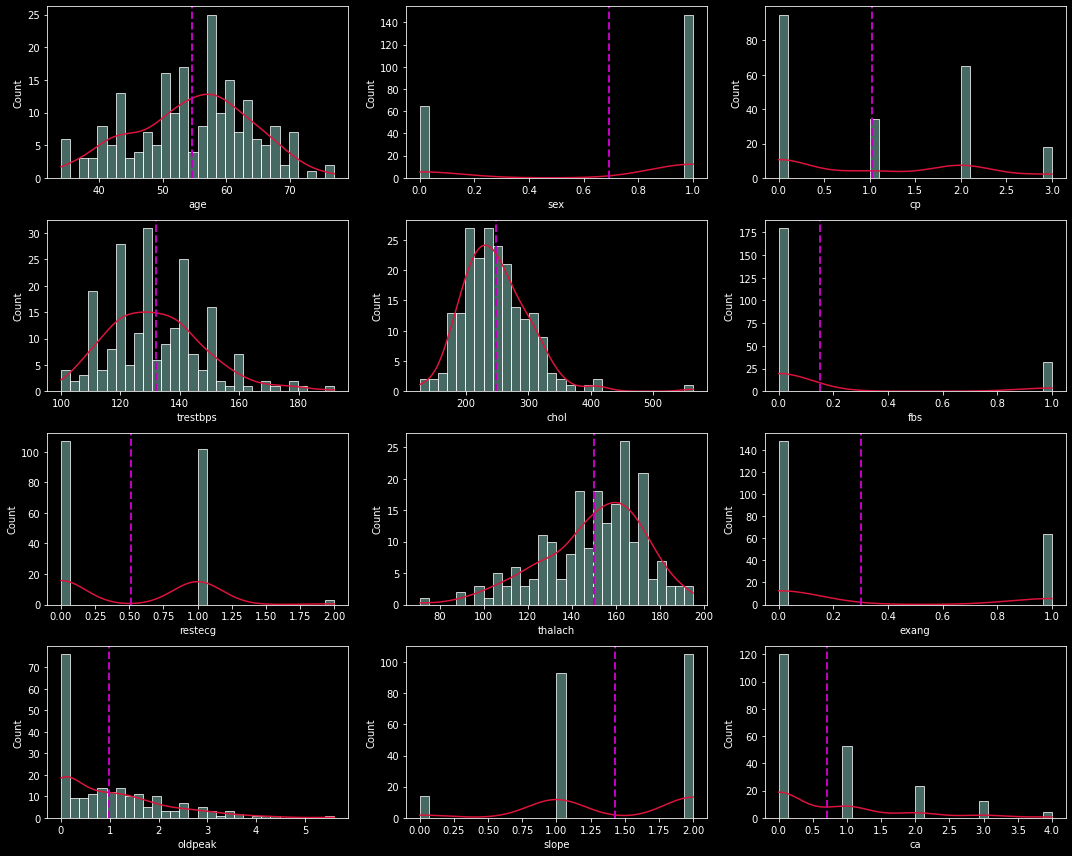

In [ ]:
features = data.drop('target',axis=1)
target = data[['target']]
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
for variable, subplot in zip(features, ax.flatten()):
    g=sns.histplot(data[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

#### From histogram we notice that features that have a reltively normal distribution and other are categories 

Heatmap for get correlation between feature to ensure that there is no redundant features or highly correlated features

<AxesSubplot:>

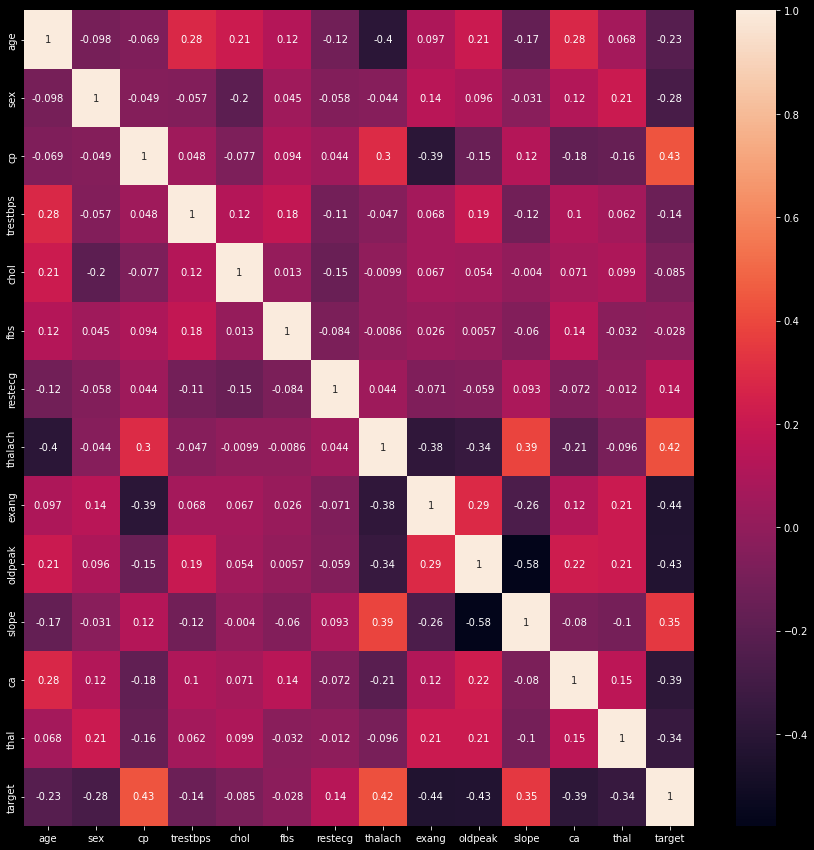

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

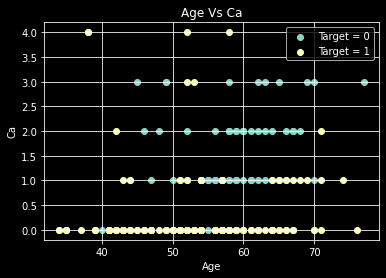

In [ ]:

plt.scatter(x=data['age'].loc[data['target'] == 0],y=data['ca'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['age'].loc[data['target'] == 1],y=data['ca'].loc[data['target'] == 1],label = "Target = 1")

plt.xlabel("Age")
plt.ylabel("Ca")
plt.grid()
plt.title("Age Vs Ca")
plt.legend()

In [ ]:
fig = px.scatter_3d(data, x='age', y='ca',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Text(0.5, 1.0, 'Age Vs Chol')

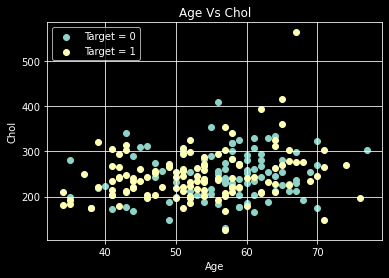

In [ ]:

plt.scatter(x=data['age'].loc[data['target'] == 0],y=data['chol'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['age'].loc[data['target'] == 1],y=data['chol'].loc[data['target'] == 1],label = "Target = 1")

plt.xlabel("Age")
plt.ylabel("Chol")
plt.grid()
plt.legend()
plt.title("Age Vs Chol")

In [ ]:
fig = px.scatter_3d(data, x='age', y='chol',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Text(0.5, 1.0, 'Thalach Vs Trestbps')

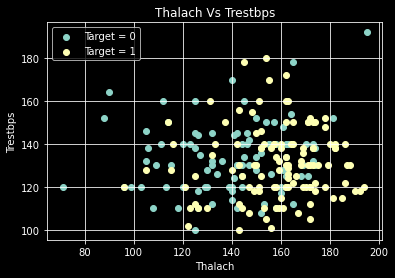

In [ ]:
# trestbps
plt.scatter(x=data['thalach'].loc[data['target'] == 0],y=data['trestbps'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['thalach'].loc[data['target'] == 1],y=data['trestbps'].loc[data['target'] == 1],label = "Target = 1")
plt.xlabel("Thalach")
plt.ylabel("Trestbps")
plt.grid()
plt.legend()
plt.title("Thalach Vs Trestbps")

Text(0.5, 1.0, 'Thalach Vs Cp')

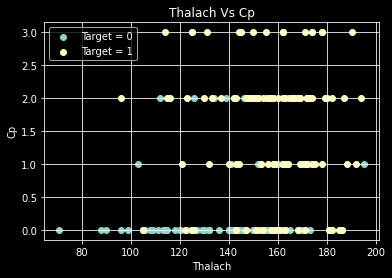

In [ ]:
# cp
# plt.scatter(x=data['thalach'],y=data['cp'])
plt.scatter(x=data['thalach'].loc[data['target'] == 0],y=data['cp'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['thalach'].loc[data['target'] == 1],y=data['cp'].loc[data['target'] == 1],label = "Target = 1")

plt.xlabel("Thalach")
plt.ylabel("Cp")
plt.grid()
plt.legend()
plt.title("Thalach Vs Cp")

Text(0.5, 1.0, 'Sex Vs Chol')

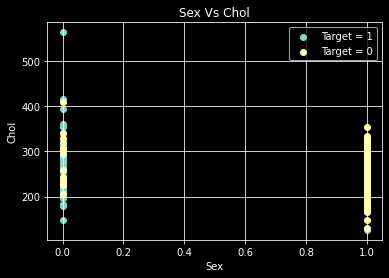

In [ ]:
plt.scatter(x=data['sex'].loc[data['target'] == 1],y=data['chol'].loc[data['target'] == 1],label = "Target = 1")
plt.scatter(x=data['sex'].loc[data['target'] == 0],y=data['chol'].loc[data['target'] == 0],label = "Target = 0")

plt.xlabel("Sex")
plt.ylabel("Chol")
plt.legend()
plt.grid()
plt.title("Sex Vs Chol")

In [ ]:
fig = px.scatter_3d(data, x='sex', y='chol',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Text(0.5, 1.0, 'Sex Vs Cp')

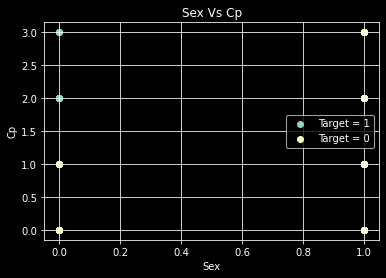

In [ ]:
plt.scatter(x=data['sex'].loc[data['target'] == 1],y=data['cp'].loc[data['target'] == 1],label = "Target = 1")
plt.scatter(x=data['sex'].loc[data['target'] == 0],y=data['cp'].loc[data['target'] == 0],label = "Target = 0")

plt.xlabel("Sex")
plt.ylabel("Cp")
plt.legend()
plt.grid()
plt.title("Sex Vs Cp")

In [ ]:
fig = px.scatter_3d(data, x='sex', y='cp',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

using 3D Graphs give better interpretation for the data 
most features are linearly separable so we will loop over all feature combination to get best TWO 

In [ ]:

new_data = data.drop('target',axis=1)
feature = new_data.columns
iterations = 500
alpha = 1e-4
label = data[['target']]

best_accuracy_train = 0.0
best_accuracy_test = 0.0

for f1 in range(len(feature)):
    for f2 in range(len(feature)):
        if f2 > f1 :
            
            new_features = pd.DataFrame([data[feature[f1]],data[feature[f2]]] ).T
            # print(new_features)
            weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,iterations,alpha)
            prediction_train = predict(new_features,label, weight)
            prediction_test = predict(test[[feature[f1],feature[f2]]],test[['target']],weight) 
            print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format(feature[f1],feature[f2]))
            print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
            print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
            print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
            print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
            print(Fore.BLACK +"Number of Iterations = {}".format(loops))
            
            current_train_accuracy = prediction_train
            #prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100
            current_test_accuracy = prediction_test 
            #prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100
            print(Fore.CYAN + "Train Accuracy = {}".format(current_train_accuracy))
            print(Fore.CYAN + "Test Accuracy = {}".format(current_test_accuracy))
            if current_train_accuracy > best_accuracy_train:
                best_accuracy_train = current_train_accuracy
            if current_test_accuracy > best_accuracy_test:
                best_accuracy_test = current_test_accuracy

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))


Logistic Regression Info. of age and sex:- 
Bias = 9.92572263049239e-05
Weight_0 = 0.002638834164464123
Weight_1 = -0.00010882989206748988
Cost/Loss = 0.6897010518041796
Number of Iterations = 26
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and cp:- 
Bias = 0.00011369911912979171
Weight_0 = 0.0027726839795628585
Weight_1 = 0.0008507823246201176
Cost/Loss = 0.6894586456822253
Number of Iterations = 32
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and trestbps:- 
Bias = 0.0003372945557679159
Weight_0 = -0.017147616798215012
Weight_1 = 0.008718208741239861
Cost/Loss = 0.6775332132570665
Number of Iterations = 397
Train Accuracy = 0.5707547169811321
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and chol:- 
Bias = 0.00018891168056472772
Weight_0 = -0.012506968376933585
Weight_1 = 0.003605370388240177
Cost/Loss = 0.678759612424267
Number of Iterations = 2

We get Best Accuracy from cp and ca features

#### Shuffeling Data

As we notice that shuffling data dosen't enhanced the accuracy 

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data_shuffled = data.sample(frac=1).reset_index(drop=True)
data_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
1,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
2,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
3,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
4,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0


In [ ]:
new_data = data_shuffled.drop('target',axis=1)
feature = new_data.columns
iterations = 500
alpha = 1e-4
label = data_shuffled[['target']]

best_accuracy_train = 0.0
best_accuracy_test = 0.0

for f1 in range(len(feature)):
    for f2 in range(len(feature)):
        if f2 > f1 :
            
            new_features = pd.DataFrame([data[feature[f1]],data[feature[f2]]] ).T
            # print(new_features)
            weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,iterations,alpha)
            prediction_train = predict(new_features,label, weight)
            prediction_test = predict(test[[feature[f1],feature[f2]]],test[['target']],weight) 
            print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format(feature[f1],feature[f2]))
            print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
            print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
            print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
            print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
            print(Fore.BLACK +"Number of Iterations = {}".format(loops))
            
            current_train_accuracy = prediction_train
            #prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100
            current_test_accuracy = prediction_test
            #prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100
            print(Fore.CYAN + "Train Accuracy = {}".format(current_train_accuracy))
            print(Fore.CYAN + "Test Accuracy = {}".format(current_test_accuracy))
            if current_train_accuracy > best_accuracy_train:
                best_accuracy_train = current_train_accuracy
            if current_test_accuracy > best_accuracy_test:
                best_accuracy_test = current_test_accuracy

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))


Logistic Regression Info. of age and sex:- 
Bias = 9.759878428244922e-05
Weight_0 = 0.0028402067728230244
Weight_1 = 0.00018885774362219936
Cost/Loss = 0.6892234708892071
Number of Iterations = 27
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and cp:- 
Bias = 9.762865088023868e-05
Weight_0 = 0.002841788833349078
Weight_1 = -3.151243881934777e-05
Cost/Loss = 0.6892336495851263
Number of Iterations = 27
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and trestbps:- 
Bias = 0.00021589081172430422
Weight_0 = -0.009131755565550893
Weight_1 = 0.005398802757047225
Cost/Loss = 0.6828848893404614
Number of Iterations = 254
Train Accuracy = 0.5566037735849056
Test Accuracy = 0.4945054945054945
Logistic Regression Info. of age and chol:- 
Bias = 0.00012790730780850085
Weight_0 = -0.011162365969568891
Weight_1 = 0.0033457755345259145
Cost/Loss = 0.6794519009195042
Number of Iterations 

##### Change Learning Rate

In [ ]:
iterations = 500
alphas = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
best_alpha = 0
label = data[['target']]

best_accuracy_train = 0.0
best_accuracy_test = 0.0

for alpha in alphas :
    new_features = data[['cp','ca']]
    # print(new_features)
    weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,iterations,alpha)
    prediction_train = predict(new_features,label, weight)
    prediction_test = predict(test[['cp','ca']],test[['target']],weight) 
    print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format('cp','ca'))
    print(Fore.BLACK +"Learning Rate = {}".format(alpha))
    print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
    print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
    print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
    print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
    print(Fore.BLACK +"Number of Iterations = {}".format(loops))
    
    current_train_accuracy = prediction_train
    #prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100
    current_test_accuracy = prediction_test
    #prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100
    print(Fore.CYAN + "Train Accuracy = {}".format(current_train_accuracy))
    print(Fore.CYAN + "Test Accuracy = {}".format(current_test_accuracy))
    if current_train_accuracy > best_accuracy_train:
        best_accuracy_train = current_train_accuracy
        best_alpha = alpha
    if current_test_accuracy > best_accuracy_test:
        best_accuracy_test = current_test_accuracy

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))
print(Fore.GREEN + "Best Learning Rate = {}".format(best_alpha))


Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.1
Bias = -0.02630977940387888
Weight_0 = 0.9670190067850307
Weight_1 = -0.886156028715589
Cost/Loss = 0.5088471622952192
Number of Iterations = 199
Train Accuracy = 0.7452830188679245
Test Accuracy = 0.7582417582417582
Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.01
Bias = 0.03638634265972913
Weight_0 = 0.6389988510378193
Weight_1 = -0.5302797706641558
Cost/Loss = 0.5309068882743722
Number of Iterations = 500
Train Accuracy = 0.7641509433962265
Test Accuracy = 0.7472527472527473
Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.001
Bias = 0.02371952542812612
Weight_0 = 0.12934964946080849
Weight_1 = -0.07361631357721912
Cost/Loss = 0.647530551719338
Number of Iterations = 500
Train Accuracy = 0.7547169811320755
Test Accuracy = 0.7692307692307693
Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.0001
Bias = 0.002987253378496644
Weight_0 = 0.014436777443356892
Weight_1 = -0.0074279508180555955


Here we tried Very big learning rate (step) that leads to a relatively generalized model and less numer of iterations that safe alot of time but in some situations it may overshouts while when we use a very small learning rate that leads to alot of iterations and if it too small it may never reach local min.

##### Change Iterations

In [ ]:
iterations = [2,4,8,10,20,100,500,1500]
alpha = 0.0001
label = data[['target']]

best_accuracy_train = 0.0
best_accuracy_test = 0.0

for i in iterations :
    new_features = data[['cp','ca']]
    # print(new_features)
    weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,i,alpha)
    prediction_train = predict(new_features,label, weight)
    prediction_test = predict(test[['cp','ca']],test[['target']],weight) 
    print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format('cp','ca'))
    print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
    print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
    print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
    print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
    print(Fore.BLACK +"Number of Iterations = {}".format(loops))
    
    current_train_accuracy = prediction_train
    #prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100
    current_test_accuracy = prediction_test
    #prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100
    print(Fore.CYAN + "Train Accuracy = {}".format(current_train_accuracy))
    print(Fore.CYAN + "Test Accuracy = {}".format(current_test_accuracy))
    if current_train_accuracy > best_accuracy_train:
        best_accuracy_train = current_train_accuracy
        best_alpha = alpha
    if current_test_accuracy > best_accuracy_test:
        best_accuracy_test = current_test_accuracy

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))


Logistic Regression Info. of cp and ca:- 
Bias = 1.226351039627117e-05
Weight_0 = 5.848906005251041e-05
Weight_1 = -2.9716976320532183e-05
Cost/Loss = 0.6931249087277557
Number of Iterations = 2
Train Accuracy = 0.4386792452830189
Test Accuracy = 0.4945054945054945
Logistic Regression Info. of cp and ca:- 
Bias = 2.452445882261791e-05
Weight_0 = 0.00011697209655363667
Weight_1 = -5.943393325906207e-05
Cost/Loss = 0.6931026407383085
Number of Iterations = 4
Train Accuracy = 0.6367924528301887
Test Accuracy = 0.6043956043956044
Logistic Regression Info. of cp and ca:- 
Bias = 4.9038671513978524e-05
Weight_0 = 0.0002339201020176866
Weight_1 = -0.00011886778790367801
Cost/Loss = 0.6930581162842229
Number of Iterations = 8
Train Accuracy = 0.75
Test Accuracy = 0.7472527472527473
Logistic Regression Info. of cp and ca:- 
Bias = 6.129193665309392e-05
Weight_0 = 0.00029238507253844903
Weight_1 = -0.00014858468506668578
Cost/Loss = 0.6930358598178704
Number of Iterations = 10
Train Accuracy = 0

we notice that the more iterations the model make the more generalize and gradient descent get better values but it may fall in local min. that can't get away from and in other situation where number of iterations is so big that stopping condition in Logistic Regression function will use as the difference between loss_0 and loss_1 is very small that there is no learning   